# Bike Sharing Data Analysis

## 1. Introduction

In this assignment, we will analyze a dataset of bike-sharing systems, focusing on various factors influencing bike rentals. We'll preprocess the data, visualize relationships, and build a predictive model.

## 2. Import Libraries

First, let's import the necessary libraries.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## 3. Load and Inspect Data

Load the dataset and get an initial understanding of its structure.

In [2]:
# Load the dataset
bksh = pd.read_csv("day.csv")

# Display the first few rows of the dataset
bksh.head()

# Display information about the dataset
bksh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


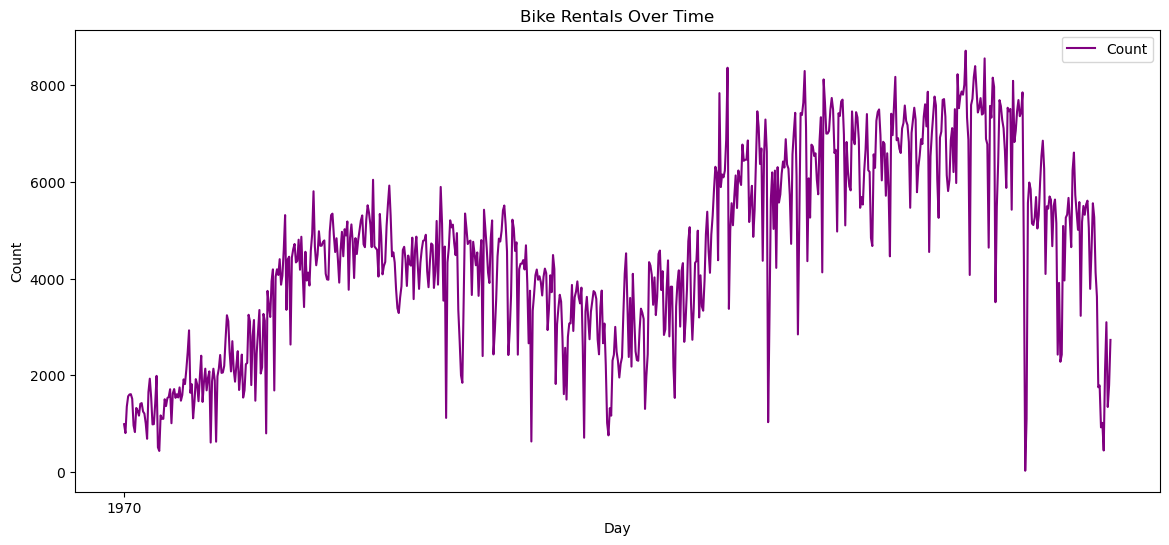

In [3]:
# Count of rentals over time
plt.figure(figsize=(14, 6))
plt.plot(pd.to_datetime(bksh.index), bksh['cnt'], label='Count', color='purple')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Bike Rentals Over Time')
plt.legend()
plt.show()

## 4. Data Preprocessing

Drop unnecessary columns and visualize the relationships between variables.

In [4]:
# Drop irrelevant columns
bksh.drop(columns=["casual","registered","instant","dteday",],inplace=True)
bksh.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## 5. Exploratory Data Analysis

### 5.1 Continuous Variables

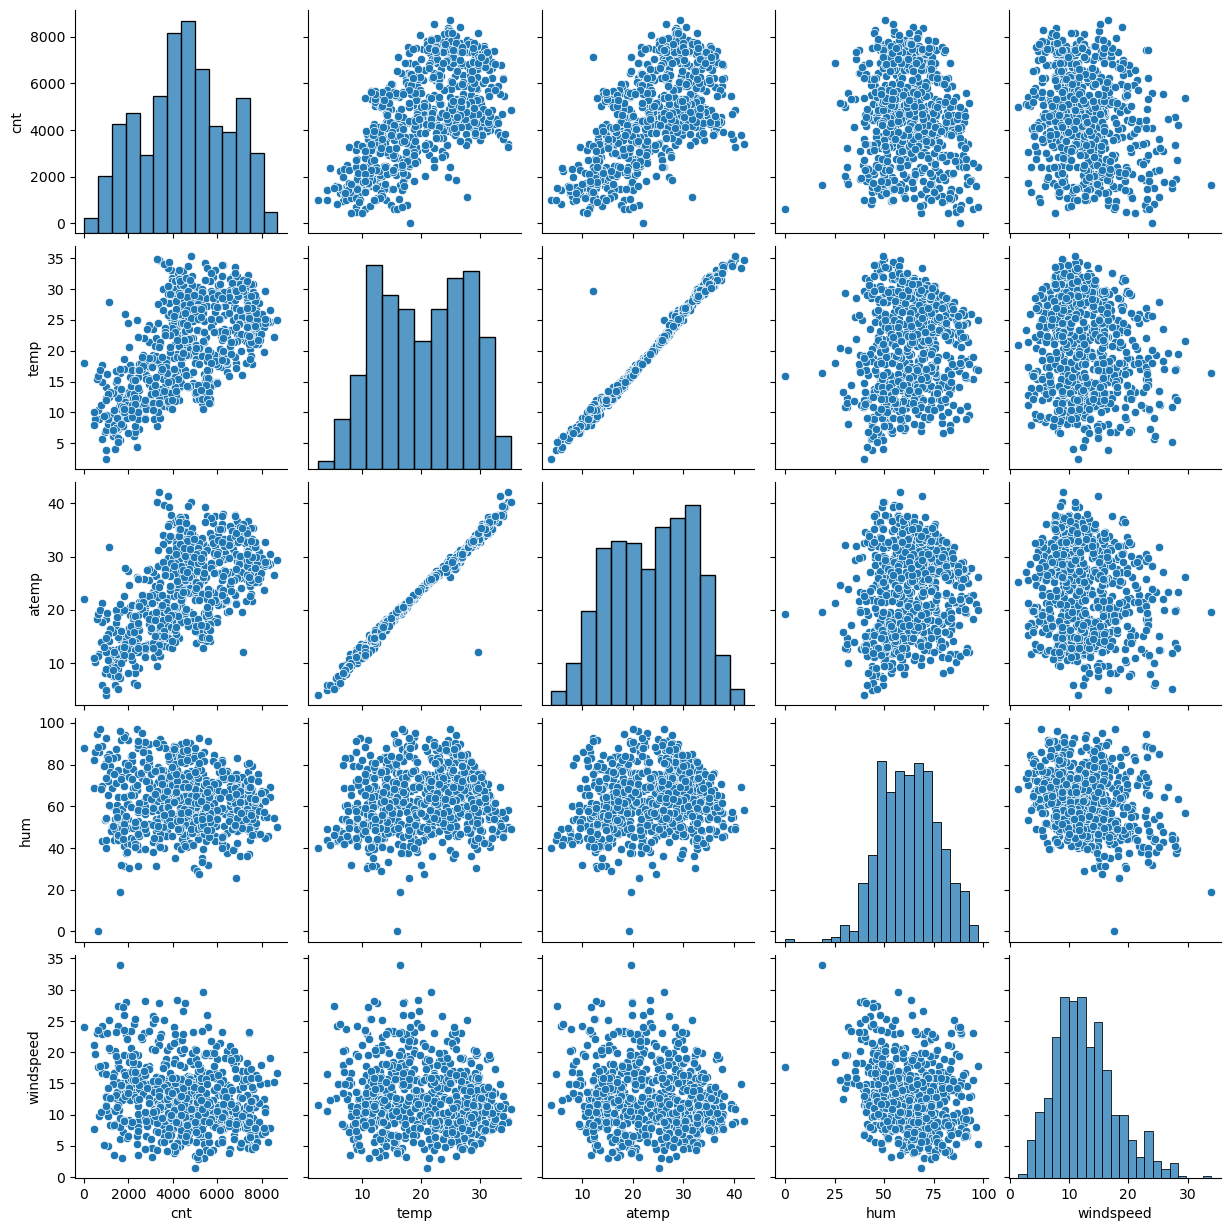

In [5]:
# Plot pairplot for continuous variables
continous_cols = ["cnt", "temp", "atemp", "hum", "windspeed"]
sns.pairplot(bksh[continous_cols])
plt.show()

### 5.2 Categorical Variables

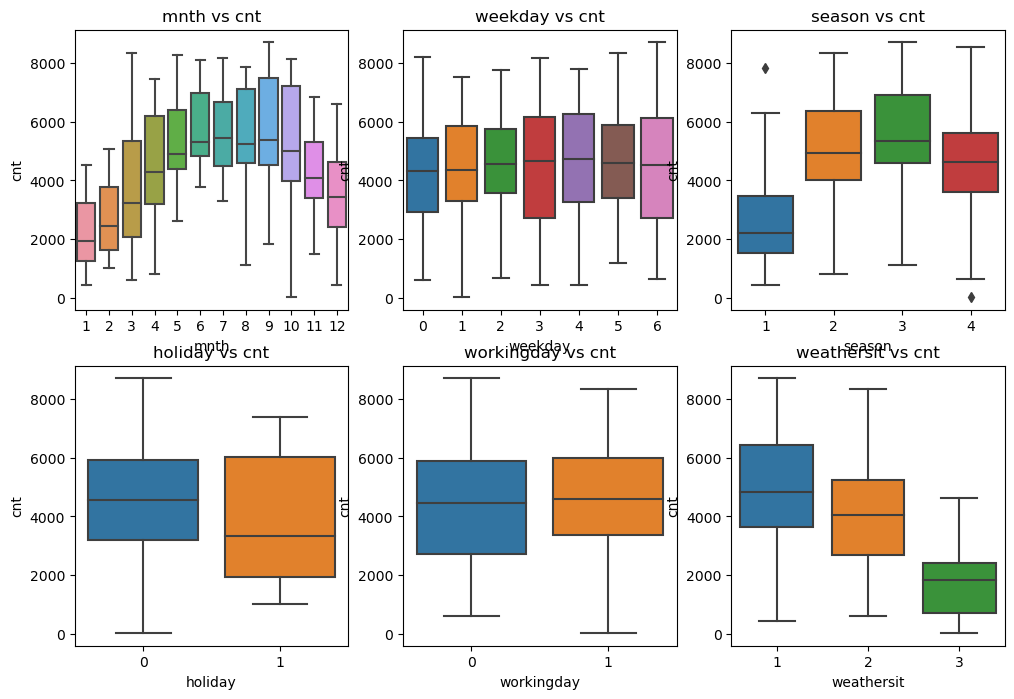

In [6]:
# Plot boxplots for categorical variables

Categorical_cols = ["cnt","mnth","weekday","season","holiday","workingday","weathersit"]
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
sns.boxplot(x="mnth",y="cnt",data=bksh)
plt.title('mnth vs cnt')

plt.subplot(2,3,2)
sns.boxplot(x="weekday",y="cnt",data=bksh)
plt.title('weekday vs cnt')


plt.subplot(2,3,3)
sns.boxplot(x="season",y="cnt",data=bksh)
plt.title('season vs cnt')

plt.subplot(2,3,4)
sns.boxplot(x="holiday",y="cnt",data=bksh)
plt.title('holiday vs cnt')

plt.subplot(2,3,5)
sns.boxplot(x="workingday",y="cnt",data=bksh)
plt.title('workingday vs cnt')

plt.subplot(2,3,6)
sns.boxplot(x="weathersit",y="cnt",data=bksh)
plt.title('weathersit vs cnt')

plt.show()

### 5.3 Correlation Heatmap

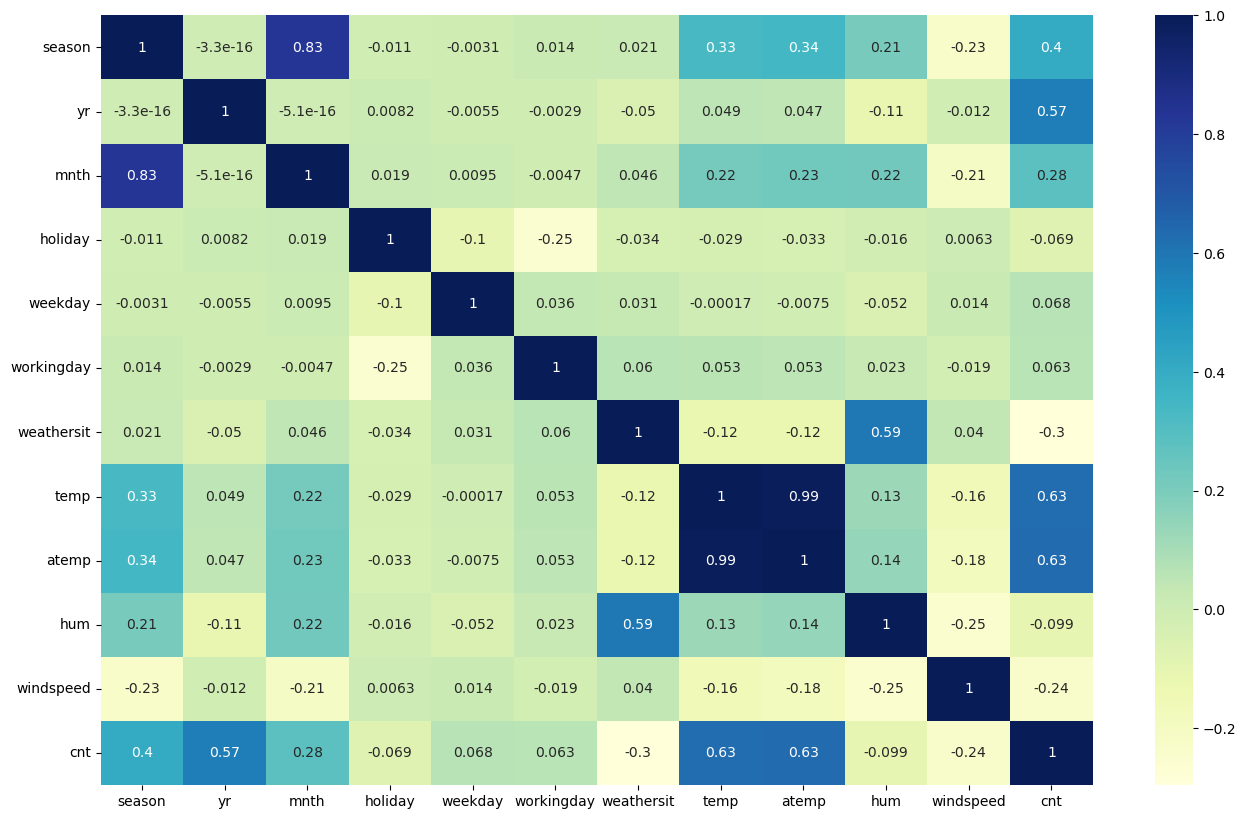

In [7]:
# Plot heatmap for correlation matrix
plt.figure(figsize= (16,10))
sns.heatmap(bksh.corr(),annot=True ,cmap='YlGnBu')
plt.show()

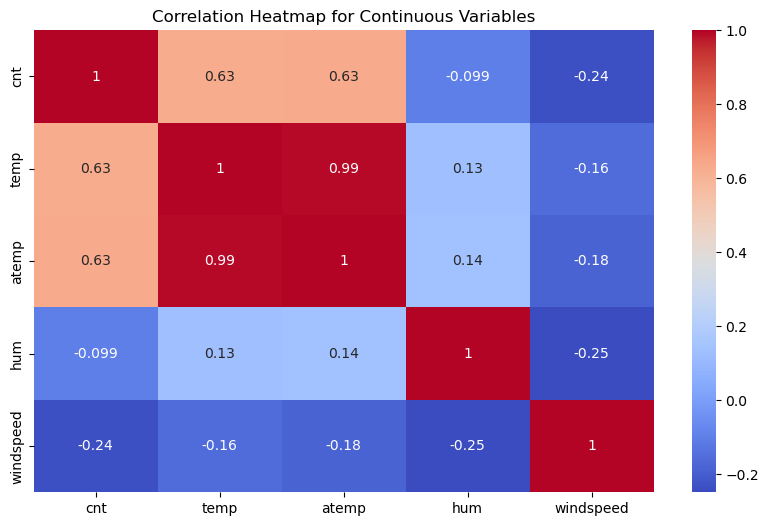

In [8]:
# Heatmap for continuous variables only
plt.figure(figsize=(10, 6))
sns.heatmap(bksh[continous_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Continuous Variables')
plt.show()

## 6. Data Transformation

### 6.1 Drop Columns and Encode Categorical Variables

In [9]:
bksh["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [10]:
# Drop the 'weekday' column as it has little impact
bksh.drop(columns=["weekday"],inplace=True)
bksh.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bksh["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
# Encode categorical variables using dummy variables
dummy_variables = ["season","mnth","weathersit"]
bksh=pd.get_dummies(bksh,columns=dummy_variables,drop_first=True)

### 6.2 Split Data into Training and Testing Sets

In [13]:
# Split the data into training and testing sets
bksh_train,bksh_test=train_test_split(bksh,train_size=0.7,random_state=100)
print(bksh_train.shape)
print(bksh_test.shape)

(510, 24)
(220, 24)


In [14]:
bksh.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weathersit_2', 'weathersit_3'],
      dtype='object')

### 6.3 Scale Numeric Variables

In [15]:
# Scale numeric variables using MinMaxScaler
scaler=MinMaxScaler()
num_vars =['temp','atemp','hum','windspeed']
bksh_train[num_vars] = scaler.fit_transform(bksh_train[num_vars])
bksh_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,4485.337255,0.247059,0.262745,...,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,1950.666077,0.431725,0.440557,...,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 6.4 Define Target and Features

In [16]:
y_train=bksh_train.pop('cnt')
X_train=bksh_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

## 7. Model Building

### 7.1 Train the Model

In [18]:
# add a constant

X_train_sm=sm.add_constant(X_train['atemp'])

#create first model

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    1431.848840
atemp    5950.404439
dtype: float64

In [19]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           4.77e-62
Time:                        22:21:03   Log-Likelihood:                -4448.0
No. Observations:                 510   AIC:                             8900.
Df Residuals:                     508   BIC:                             8909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1431.8488    172.338      8.308      0.000    1093.265    1770.433
atemp       5950.4044    310.351     19.173      0.000    5340.674    6560.135
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Add a constant to the features
X_train_sm=X_train[['yr','temp','holiday', 'workingday', 'hum', 'windspeed','season_2', 'season_3', 
                    'season_4', 'mnth_3', 
        'mnth_8', 'mnth_9', 'mnth_10',
        'weathersit_2', 'weathersit_3']]
X_train_sm=sm.add_constant(X_train_sm)


#create first model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          6.20e-189
Time:                        22:21:03   Log-Likelihood:                -4111.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1944.2885    241.779      8.042      0.000    1469.246    2419.331
yr            1994.0998     70.252     28.385      0.000    1856.071    2132.129
temp          4303.0401    294.858     14.594      0.000    3723.710    4882.370
holiday       -687.8349    227.056     -3.029      0.003   -1133.949    -241.721
workingday     142.2175     76.297      1.864      0.063      -7.688     292.123
hum          -1487.4559    326.733     -4.553      0.000   -2129.413    -845.499
windspeed    -1598.6552    222.834     -7.174      0.000   -2036.475   -1160.836
season_2      1061.4747    130.544      8.131      0.000     804.984    1317.965
season_3       314.6687    196.609      1.600      0.110     -71.625     700.963
season_4      1307.1697    122.006     10.714      0.000    1067.454    1546.885
mnth_3         237.2746    125.432      1.892      0.059      -9.171     483.720
mnth_8         435.4755    151.757      2.870      0.004     137.306     733.645
mnth_9        1039.8265    150.039      6.930      0.000     745.034    1334.619
mnth_10        350.1003    152.752      2.292      0.022      49.976     650.225
weathersit_2  -479.3509     90.753     -5.282      0.000    -657.661    -301.041
weathersit_3 -2144.0013    229.485     -9.343      0.000   -2594.889   -1693.114
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.879
Skew:                          -0.666   Prob(JB):                     7.84e-38
Kurtosis:                       5.504   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7.2 Check for Multicollinearity

In [21]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF'] =[variance_inflation_factor(X_train_sm.values ,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] =round(vif['VIF'] , 2)
vif =vif.sort_values(by="VIF" ,ascending=False)
vif

,Features,VIF
0,const,49.09
8,season_3,6.29
2,temp,3.72
7,season_2,2.66
9,season_4,2.33
5,hum,1.90
11,mnth_8,1.68
14,weathersit_2,1.56
13,mnth_10,1.51
12,mnth_9,1.40


### 8. Residual Analysis

<Axes: ylabel='Density'>

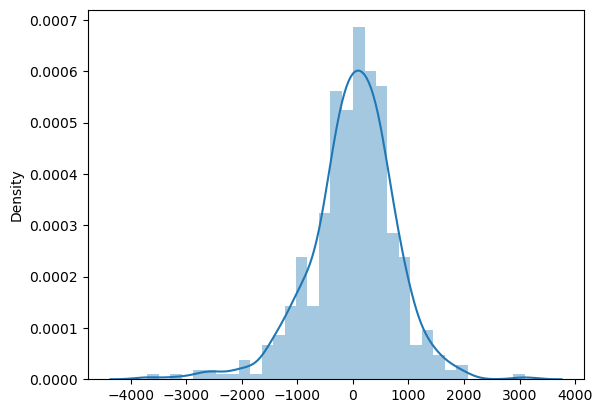

In [22]:
#Residual Analysis

y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

## 9. Prediction and Evaluation on Test Data

### 9.1 Scale Test Data

In [23]:
##Prediction and Evaluation on Test Data

num_vars =['temp','atemp','hum','windspeed']
bksh_test[num_vars] = scaler.transform(bksh_test[num_vars])
bksh_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,4560.559091,0.263636,0.245455,...,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,1904.968544,0.441609,0.431338,...,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 9.2 Define Target and Features for Test Data

In [24]:
# Define target and feature variables for test set
y_test=bksh_test.pop('cnt')
X_test=bksh_test

#Add Constant
X_test_sm =sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]
X_test_sm

,const,yr,temp,holiday,workingday,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
184,1.0,0,0.831783,1,0,0.657364,0.084219,0,1,0,0,0,0,0,1,0
535,1.0,1,0.901354,0,1,0.610133,0.153728,1,0,0,0,0,0,0,0,0
299,1.0,0,0.511964,0,1,0.837699,0.334206,0,0,1,0,0,0,1,1,0
221,1.0,0,0.881625,0,1,0.437098,0.339570,0,1,0,0,1,0,0,0,0
152,1.0,0,0.817246,0,1,0.314298,0.537414,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0.519232,0,1,0.756118,0.283397,0,0,1,0,0,0,0,0,0
127,1.0,0,0.584649,0,0,0.650923,0.069510,1,0,0,0,0,0,0,0,0
640,1.0,1,0.745598,0,1,0.817947,0.052115,0,0,1,0,0,0,1,1,0
72,1.0,0,0.331557,0,1,0.512107,0.203418,0,0,0,1,0,0,0,0,0


### 9.3 Make Predictions and Evaluate

In [25]:
# Make predictions on test set
y_test_pred = lr_model.predict(X_test_sm)

# Evaluate the model
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8202383526753301